In [93]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
import wave
from scipy import signal

In [109]:
# file_name = 'test_data1000.wav'
# file_name = 'test1.wav'
# file_name = 'Sounds/Expchirp.wav'
# file_name = 'Sounds/Linchirp.wav'
# file_name = 'Sounds/sonar.wav'
# file_name = 'Sounds/Soroka.wav'
# file_name = 'Sounds/Petuh.wav'
# file_name = 'Sounds/Vorona.wav'
file_name = 'Sounds/Volk.wav'

wav = wave.open(file_name, mode="r")
(nchannels, sampwidth, framerate, nframes, comptype, compname) = wav.getparams()
print(wav.getparams())

amplitude = 2**(sampwidth*8 - 1)

_wave_params(nchannels=1, sampwidth=2, framerate=22050, nframes=94967, comptype='NONE', compname='not compressed')


In [110]:
samplerate, data = wavfile.read(file_name) # Кортеж: [0] - частота дискретизации файла, [1] - данные из файла
nframes = len(data)
times = np.arange(nframes)/float(samplerate)
data = data/amplitude

In [111]:
if nchannels == 2:
    data1 = np.zeros(nframes)
    data2 = np.zeros(nframes)
    for i in range(len(data)):
        data1[i] = data[i][0]
        data2[i] = data[i][1]
else: data1 = data

# Пример расчёта данных спектрограммы
#Очень длительный процесс построения графика

f, t, Sxx = signal.spectrogram(data1, samplerate)  #, return_onesided= False)
Sxx_dB = 20 * np.log10(Sxx) + 60

fig, ax = plt.subplots(figsize = (20,10))
ax.pcolormesh(t, f, Sxx_dB)
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')
ax.grid()
plt.show()

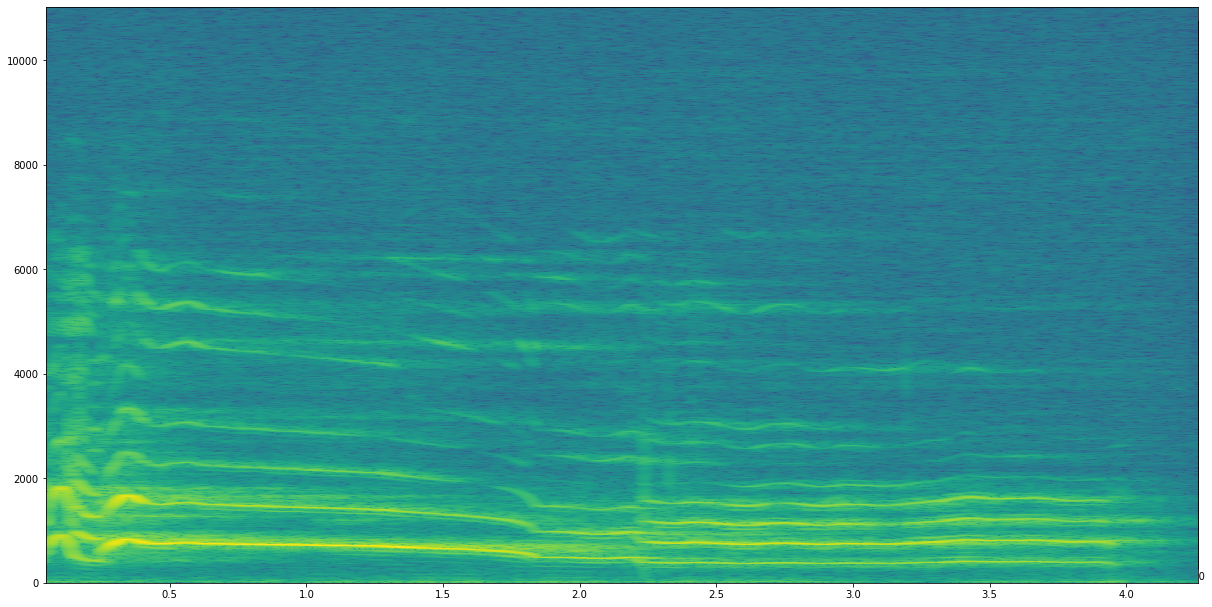

In [112]:
SAMPLE_RATE = samplerate # Hz
WINDOW_SIZE = 2048 # размер окна, в котором делается fft, разрешающая способность по вертикали(спектр)
WINDOW_STEP = 16 # шаг окна, разрешающая способность по горизонтали

def show_specgram(wave_data):
    fig, ax = plt.subplots(figsize = (20,10))
    ax = fig.add_axes((0.1, 0.1, 0.8, 0.8))
    ax.specgram(wave_data,
        NFFT=WINDOW_SIZE, noverlap=WINDOW_SIZE - WINDOW_STEP, Fs=SAMPLE_RATE)
    plt.show()

show_specgram(data1)

In [114]:
SamplesCount = nframes
dt = 1/samplerate

if nchannels == 2:
    Furie1 = 20 * np.log10(abs(np.fft.rfft(data1)) / SamplesCount)
    Furie2 = 20 * np.log10(abs(np.fft.rfft(data2)) / SamplesCount)

    Frequencies1 = np.arange(len(Furie1), dtype = float) * samplerate / SamplesCount
    Frequencies2 = np.arange(len(Furie2), dtype = float) * samplerate / SamplesCount
else:
    Furie1 = 20 * np.log10(abs(np.fft.rfft(data1)) / SamplesCount)
    Frequencies1 = np.arange(len(Furie1), dtype = float) * samplerate / SamplesCount

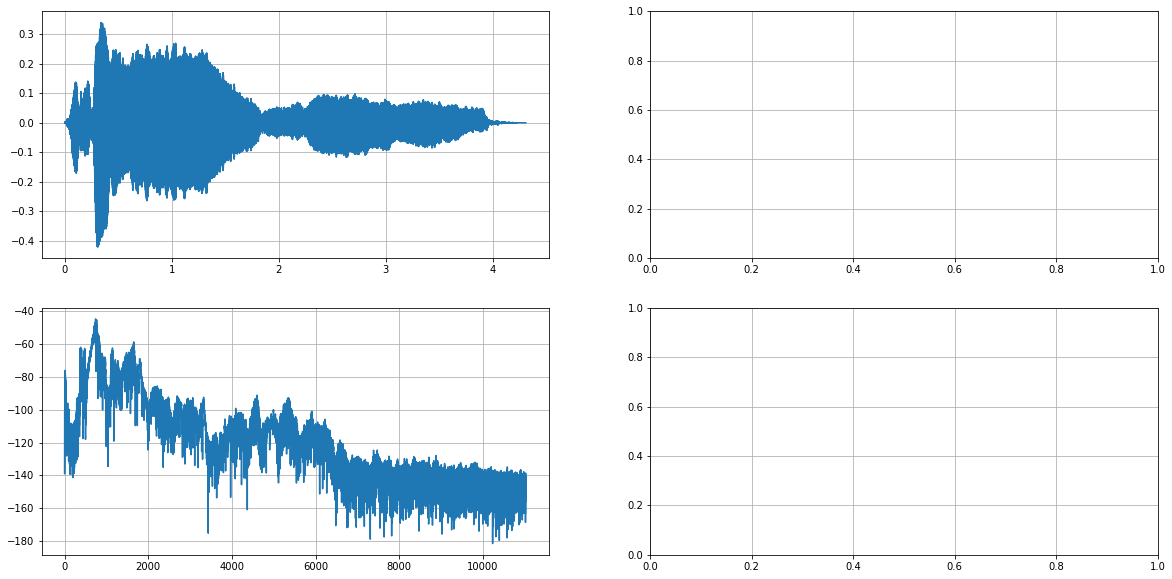

In [115]:
fig, ax = plt.subplots(2, 2, figsize = (20,10))
ax[0][0].plot(times, data1)
# ax[0][1].plot(times, data2)
ax[1][0].plot(Frequencies1, Furie1)
# ax[1][1].plot(Frequencies2, Furie2)

# ax[1][1].plot(Frequencies, Furie)
#ax[1][1].plot(Frequencies[:10000], Furie[:10000])
for ax in fig.axes:
    ax.grid()
plt.show()